In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


In [3]:
# imports
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# allow plots to appear directly in the notebook
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Advertising data set contains information about money spent on advertisement (TV, Radio and Newspaper) and their generated Sales.

df_advertising = pd.read_csv("../input/advertising-dataset/advertising.csv")
df_advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


## Assumption #1: Linear Relationship between the features and target 

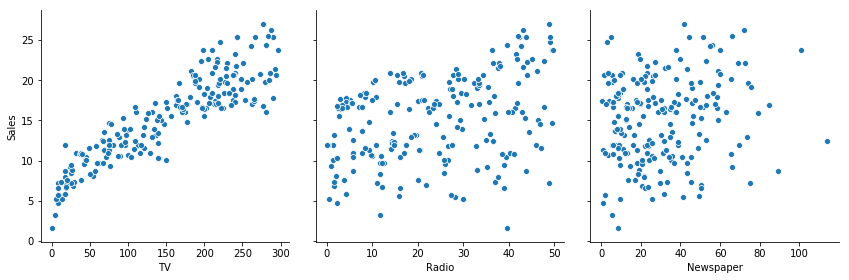

In [5]:
# visualize the relationship between the features and the target using scatterplots
sns.pairplot(df_advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 4, aspect = 1)

## Assumption #2: Little or no Multicollinearity between the features

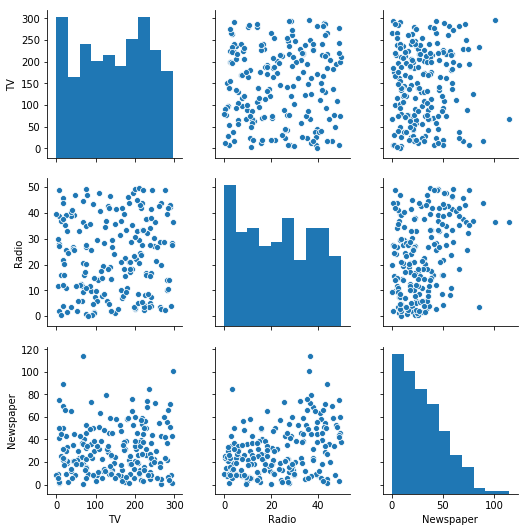

In [6]:
sns.pairplot(df_advertising[['TV','Radio','Newspaper']])

The above pair plot shows no significant relationship between the features.

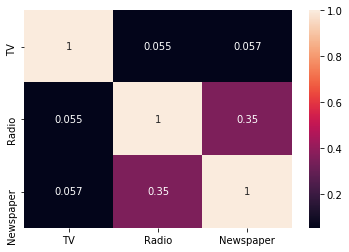

In [7]:
sns.heatmap(df_advertising[['TV','Radio','Newspaper']].corr(), annot = True)

This heatmap gives us the correlation coefficients of each feature with respect to one another which are less than 0.4. Thus the features aren’t highly correlated with each other.

## Assumption # 3: Homoscedasticity

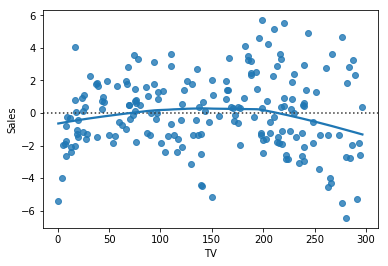

In [8]:
# This function will regress y on x and then draw a scatterplot of the residuals.

sns.residplot(x = df_advertising['TV'], y = df_advertising["Sales"], lowess = True)

# Simple linear regression 

In [9]:
Ststsmodels_model = smf.ols(formula='Sales ~ TV', data = df_advertising)
Ststsmodels_result = Ststsmodels_model.fit()

# print the coefficients
Ststsmodels_result.params

Intercept    6.974821
TV           0.055465
dtype: float64

### Model Prediction

In [10]:
# manually calculate the prediction
Sales = 6.97482149 + 0.05546477*50
Sales * 1000

9748.05999

In [11]:
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
Sales = Ststsmodels_result.predict(X_new)
Sales * 1000

0    9748.060012
dtype: float64

Thus, we predict Sales of 9,748 items in that market.

### Plotting the Least Squares Line

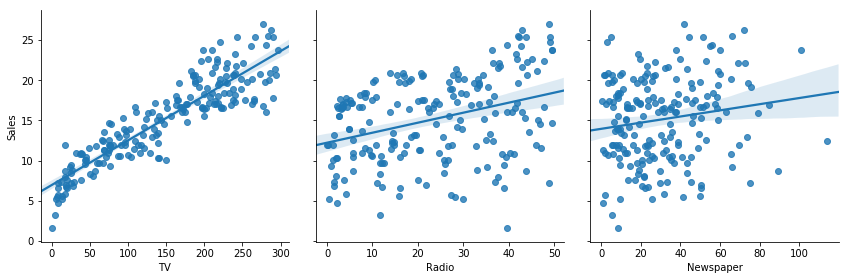

In [12]:
sns.pairplot(df_advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=4, aspect = 1, kind='reg')

## Assumption #4: Normal distribution of error terms

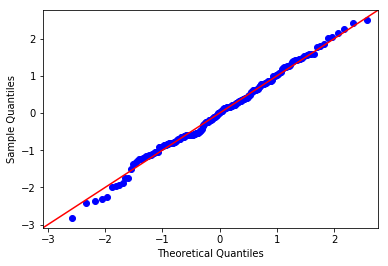

In [13]:
Ststsmodels_residual = Ststsmodels_result.resid
ax = sm.qqplot(Ststsmodels_residual, fit = True, line = "45")

In [14]:
# print the confidence intervals for the model coefficients
Ststsmodels_result.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


### Hypothesis Testing and p-values

null hypothesis:
There is no relationship between TV ads and Sales                    

alternative hypothesis:
There is a relationship between TV ads and Sales

In [15]:
# print the p-values for the model coefficients
Ststsmodels_result.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

If the p-value is less than 0.05, we reject the null hypothesis.

#### Interpreting p-values:

p-value is less than 0.05.                  
Reject the null hypothesis.                 
There is a relationship between dependent and independent variable.             
We generally ignore the p-value for the intercept.

In [16]:
# print a summary of the fitted model
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           7.93e-74
Time:                        12:13:50   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assumption #5: Little or No autocorrelation in the residuals:

The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical regression analysis. The Durbin-Watson statistic will always have a value between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation. A value of 2.0 means that there is no autocorrelation detected in the sample.

Durbin-Watson: 2.029 from the above ols summary shows that there is no autocorrelation detected in the sample.

### How Well Does the Model Fit the data?

In [17]:
# print the R-squared value for the model

print(Ststsmodels_result.rsquared)

0.8121757029987414


# Multiple Linear Regression

In [18]:
# create a fitted model with all three features
Ststsmodels_model = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df_advertising)
Ststsmodels_result = Ststsmodels_model.fit()

# print the coefficients
Ststsmodels_result.params

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [19]:
# print a summary of the fitted model
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           8.13e-99
Time:                        12:13:53   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Feature Selection

In [20]:
#Keeping features in the model if they have small p-values, check corresponding  Adjusted R2  value.

# only include TV and Radio in the model

# instantiate and fit model
Ststsmodels_model = smf.ols(formula='Sales ~ TV + Radio', data=df_advertising)
Ststsmodels_result = Ststsmodels_model.fit()

# print a summary of the fitted model
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sat, 28 Aug 2021   Prob (F-statistic):          2.39e-100
Time:                        12:13:54   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Evaluation Using Train/Test Split

In [21]:
# exclude Newspaper
X = df_advertising[['TV', 'Radio']]
y = df_advertising.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5092481618667397


In [22]:
# include Newspaper
X = df_advertising[['TV', 'Radio', 'Newspaper']]
y = df_advertising.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5096109295725846


Regularisation Approaches

In [23]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.1, normalize=True)

ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.5629820262635021


In [26]:
print(ridgeReg.intercept_)
print(ridgeReg.coef_)

5.467906805954318
[0.04987064 0.09200977 0.00464517]


In [27]:
ridgeReg = Ridge(alpha=0.9, normalize=True)

ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.67535430454532


In [28]:
print(ridgeReg.intercept_)
print(ridgeReg.coef_)

9.1440897380894
[0.02897374 0.0540241  0.01150762]


Lasso Regression


In [29]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.1, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.2690402379992043


In [30]:
print(lassoReg.intercept_)
print(lassoReg.coef_)

8.365328936759628
[0.0414167  0.02518798 0.        ]


In [31]:
lassoReg = Ridge(alpha=0.9, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.67535430454532


In [32]:
print(lassoReg.intercept_)
print(lassoReg.coef_)

9.1440897380894
[0.02897374 0.0540241  0.01150762]


Elastic Net Regression

In [35]:
from sklearn.linear_model import ElasticNet

elsticNetReg = ElasticNet( l1_ratio=0.2, normalize=True)

elsticNetReg.fit(X_train,y_train)

y_pred = elsticNetReg.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.967151916026053


In [36]:
print(elsticNetReg.intercept_)
print(elsticNetReg.coef_)

14.863932835676401
[0.0002279 0.        0.       ]


## Completed!